In [1]:
import time
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
# from mpl_toolkits.basemap import Basemap
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
import catboost as cb
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
#df = pd.read_csv('FlightDelays.csv')

In [3]:
#!conda install -c conda-forge catboost -y

In [4]:
#actual_floats = ["NET_INCOME","OP_REVENUES"]
#for col in df.columns:
#    #print(col)
##    if df[col].dtype == "Int64" and col not in actual_floats:
#       print(col)
#        #print(df[col].isna().sum())
#        df[col] = df[col].astype("Int32")
#        #print((df[col].astype("Int64") != df[col]).sum())
        

In [5]:
#df.to_pickle('flight_delays.pickle')

In [2]:
#d

In [7]:
import gc
gc.collect()

124

In [2]:
df = pd.read_pickle('flight_delays.pickle')

In [9]:
df.isna().count()

YEAR                   10915495
QUARTER                10915495
MONTH                  10915495
DAY_OF_MONTH           10915495
DAY_OF_WEEK            10915495
FL_DATE                10915495
CARRIER                10915495
FL_NUM                 10915495
Route                  10915495
ORIGIN                 10915495
DEST                   10915495
DEST_CITY              10915495
DEST_STATE             10915495
CRS_DEP_TIME           10915495
DEP_TIME               10915495
DEP_DELAY              10915495
DEP_DELAY_NEW          10915495
DEP_DEL15              10915495
DEP_DELAY_GROUP        10915495
DEP_TIME_BLK           10915495
TAXI_OUT               10915495
WHEELS_OFF             10915495
WHEELS_ON              10915495
TAXI_IN                10915495
CRS_ARR_TIME           10915495
ARR_TIME               10915495
ARR_DELAY              10915495
ARR_DELAY_NEW          10915495
ARR_DEL15              10915495
ARR_DELAY_GROUP        10915495
ARR_TIME_BLK           10915495
CANCELED

In [10]:
#cols = df.columns

In [11]:
#df['YEAR'].value_counts()

In [12]:
#for col in cols:
#    print(col)
#    print(df[col].isna().sum())

In [3]:
df = df.rename(columns={'DAY_OF_MONTH':"DAY"})

In [4]:
df['DATE'] = pd.to_datetime(df[['YEAR','MONTH', 'DAY']])

In [15]:
df.head()

,YEAR,QUARTER,MONTH,DAY,DAY_OF_WEEK,FL_DATE,CARRIER,FL_NUM,Route,ORIGIN,DEST,DEST_CITY,DEST_STATE,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,...,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,PASSENGERS,EMPFULL,EMPPART,EMPTOTAL,EMPFTE,NET_INCOME,OP_REVENUES,DATE
0,2018,1,1,1,1,2018-01-01,9E,3331,42,ABY,ATL,"Atlanta, GA",GA,700,656,-4,0,0,-1,0700-0759,11,707,745,6,803,...,-12,0,0,-1,0800-0859,0,NaN,0,63,55,38,145,NaN,NaN,NaN,NaN,NaN,2677,4191,109,4300,4246,-126.37,674.25,2018-01-01
1,2018,1,1,1,1,2018-01-01,9E,3940,42,ABY,ATL,"Atlanta, GA",GA,1511,1510,-1,0,0,-1,1500-1559,11,1521,1558,6,1616,...,-12,0,0,-1,1600-1659,0,NaN,0,65,54,37,145,NaN,NaN,NaN,NaN,NaN,2677,4191,109,4300,4246,-126.37,674.25,2018-01-01
2,2018,1,1,2,2,2018-01-02,9E,3409,42,ABY,ATL,"Atlanta, GA",GA,625,620,-5,0,0,-1,0600-0659,13,633,711,9,726,...,-6,0,0,-1,0700-0759,0,NaN,0,61,60,38,145,NaN,NaN,NaN,NaN,NaN,2677,4191,109,4300,4246,-126.37,674.25,2018-01-02
3,2018,1,1,2,2,2018-01-02,9E,3940,42,ABY,ATL,"Atlanta, GA",GA,1511,1507,-4,0,0,-1,1500-1559,11,1518,1552,6,1616,...,-18,0,0,-2,1600-1659,0,NaN,0,65,51,34,145,NaN,NaN,NaN,NaN,NaN,2677,4191,109,4300,4246,-126.37,674.25,2018-01-02
4,2018,1,1,3,3,2018-01-03,9E,3353,42,ABY,ATL,"Atlanta, GA",GA,630,631,1,1,0,0,0600-0659,11,642,715,11,729,...,-3,0,0,-1,0700-0759,0,NaN,0,59,55,33,145,NaN,NaN,NaN,NaN,NaN,2677,4191,109,4300,4246,-126.37,674.25,2018-01-03


In [5]:
def calculate_missing(df):
    missing_df = df.isnull().sum(axis=0).reset_index()
    missing_df.columns = ['variable', 'missing values']
    missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
    missing_df.sort_values('filling factor (%)').reset_index(drop = True)
    return missing_df
    

In [17]:
calculate_missing(df)

,variable,missing values,filling factor (%)
0,YEAR,0,100.000000
1,QUARTER,0,100.000000
2,MONTH,0,100.000000
3,DAY,0,100.000000
4,DAY_OF_WEEK,0,100.000000
5,FL_DATE,0,100.000000
6,CARRIER,0,100.000000
7,FL_NUM,0,100.000000
8,Route,0,100.000000
9,ORIGIN,0,100.000000


In [6]:
#_________________________________________________________
# Function that convert the 'HHMM' string to datetime.time
def format_heure(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        if chaine == 2400: chaine = 0
        chaine = "{0:04d}".format(int(chaine))
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure
#_____________________________________________________________________
# Function that combines a date and time to produce a datetime.datetime
def combine_date_heure(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])
#_______________________________________________________________________________
# Function that combine two columns of the dataframe to create a datetime format
def create_flight_time(df, col):    
    liste = []
    for index, cols in df[['DATE', col]].iterrows():    
        if pd.isnull(cols[1]):
            liste.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            liste.append(combine_date_heure(cols))
        else:
            cols[1] = format_heure(cols[1])
            liste.append(combine_date_heure(cols))
    return pd.Series(liste)
 

In [7]:
df['SCHEDULED_DEPARTURE'] = create_flight_time(df, 'CRS_DEP_TIME')

In [10]:
df['CANCELED'].value_counts()

0    10713410
1      202085
Name: CANCELED, dtype: int64

In [16]:
df[df['CANCELED'] == 1]['DEP_DELAY'].isna().count()

202085

In [27]:
df['CANCELLATION_CODE'].value_counts().sum()

4

In [22]:
df['CANCELLATION_CODE'].value_counts()

B    109444
A     55052
C     37533
D        56
Name: CANCELLATION_CODE, dtype: int64

In [20]:
df['DIVERTED'].value_counts()

0    10887539
1       27956
Name: DIVERTED, dtype: int64

In [50]:
df[df['DIVERTED'] == 1]['DEP_DELAY'].mean()

nan

In [49]:
df[df['DIVERTED'] == 0]['DEP_DELAY'].mean()

5.568280283074087

In [51]:
8832232 

8832232

In [64]:
df[df['CARRIER_DELAY'].isna()]['DEP_DELAY'].max()

1700

In [65]:
df[~df['CARRIER_DELAY'].isna()]['DEP_DELAY'].max()

2710

In [69]:
df[df['CARRIER_DELAY'].isna()]['DEP_DELAY'].mean()

-1.7292657802952336

In [68]:
df[~df['CARRIER_DELAY'].isna()]['DEP_DELAY'].mean() 

61.58374509344538

In [73]:
print(df[df['WEATHER_DELAY'].isna()]['ARR_DELAY'].mean())
print(df[~df['WEATHER_DELAY'].isna()]['ARR_DELAY'].mean())

-9.157834544281974
66.35686468775185


In [74]:
df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FL_DATE', 'CARRIER',
       'FL_NUM', 'Route', 'ORIGIN', 'DEST', 'DEST_CITY', 'DEST_STATE',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK',
       'CANCELED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'PASSENGERS', 'EMPFULL', 'EMPPART', 'EMPTOTAL', 'EMPFTE', 'NET_INCOME',
       'OP_REVENUES', 'DATE', 'SCHEDULED_DEPARTURE'],
      dtype='object')

In [ ]:
to_be_considered = ['WHEELS_ON', 'WHEELS_OFF', '']

In [48]:
df[df['DIVERTED'] == 1]['DEP_DELAY'].isna().sum()

27956

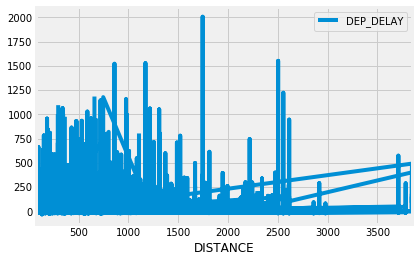

In [82]:
df[:60000].plot.line(x="DISTANCE", y="DEP_DELAY")

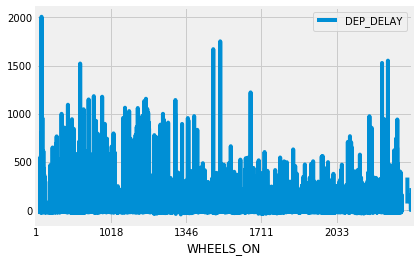

In [99]:
df[:100000].sort_values(by="WHEELS_ON").plot.line(x="WHEELS_ON", y="DEP_DELAY")

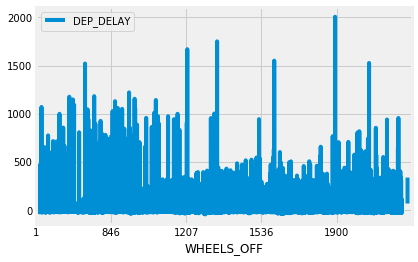

In [98]:
df[:100000].sort_values(by="WHEELS_OFF").plot.line(x="WHEELS_OFF", y="DEP_DELAY")

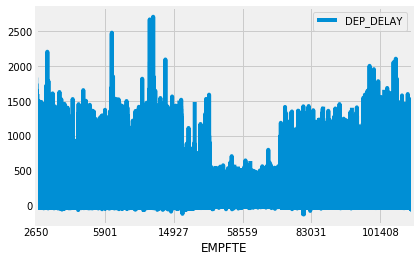

In [104]:
df.sort_values(by="EMPFTE").plot.line(x="EMPFTE", y="DEP_DELAY")

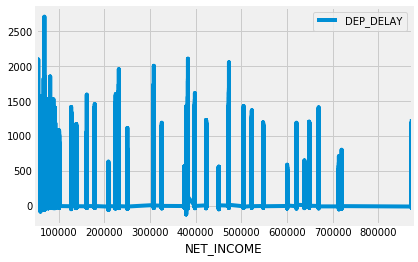

In [112]:
df[df['NET_INCOME'] > 50000].sort_values(by="NET_INCOME").plot.line(x="NET_INCOME", y="DEP_DELAY")

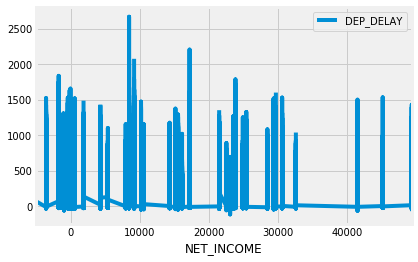

In [113]:
df[df['NET_INCOME'] < 50000].sort_values(by="NET_INCOME").plot.line(x="NET_INCOME", y="DEP_DELAY")

In [ ]:
PASSENGERS

In [109]:
df["NET_INCOME"].value_counts()

719207.00    349059
713303.00    348761
600011.00    344363
637828.00    343999
374997.00    330949
              ...  
62359.28      21317
28448.86      21250
92521.49      21098
45133.27      19689
50031.22      19519
Name: NET_INCOME, Length: 102, dtype: int64

In [110]:
df["CARRIER"].value_counts()

WN    2040852
DL    1465444
AA    1397726
OO    1181772
UA     946594
YX     475774
MQ     455179
B6     453450
OH     420985
AS     374914
9E     370783
YV     326528
NK     274911
EV     270850
F9     183123
G4     150351
HA     126259
Name: CARRIER, dtype: int64

In [9]:
variables_to_remove = ['TAXI_OUT', 'TAXI_IN', 'WHEELS_ON', 'WHEELS_OFF', 'DATE', \
                       'SECURITY_DELAY','LATE_AIRCRAFT_DELAY', 'NAS_DELAY', \
                       'WEATHER_DELAY', 'DIVERTED', 'CANCELED', 'CANCELLATION_CODE', \
                        'AIR_TIME', 'FL_NUM']

In [21]:
#for var in variables_to_remove:
#    if var not in df.columns:
#        print(var)

In [10]:
delete_df = df.drop(variables_to_remove, axis = 1)

In [11]:
select_df = delete_df[['CARRIER', 'ORIGIN', 'DEST',
        'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
        'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
        'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', "SCHEDULED_DEPARTURE", "DAY", "MONTH", "YEAR"]]

In [24]:
df['CARRIER'].value_counts()

WN    2040852
DL    1465444
AA    1397726
OO    1181772
UA     946594
YX     475774
MQ     455179
B6     453450
OH     420985
AS     374914
9E     370783
YV     326528
NK     274911
EV     270850
F9     183123
G4     150351
HA     126259
Name: CARRIER, dtype: int64

In [25]:
select_df.head()

,CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,SCHEDULED_DEPARTURE,DAY,MONTH,YEAR
0,9E,ABY,ATL,700,656,-4,803,751,-12,63,55,2018-01-01 07:00:00,1,1,2018
1,9E,ABY,ATL,1511,1510,-1,1616,1604,-12,65,54,2018-01-01 15:11:00,1,1,2018
2,9E,ABY,ATL,625,620,-5,726,720,-6,61,60,2018-01-02 06:25:00,2,1,2018
3,9E,ABY,ATL,1511,1507,-4,1616,1558,-18,65,51,2018-01-02 15:11:00,2,1,2018
4,9E,ABY,ATL,630,631,1,729,726,-3,59,55,2018-01-03 06:30:00,3,1,2018


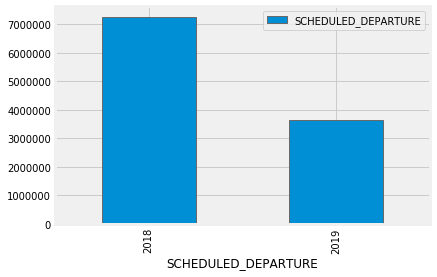

In [26]:
select_df[['SCHEDULED_DEPARTURE']].groupby(select_df['SCHEDULED_DEPARTURE'].dt.year).count().plot(kind="bar")

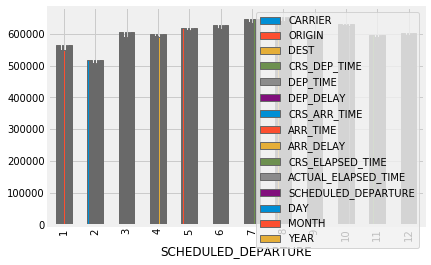

In [27]:
select_df[select_df['SCHEDULED_DEPARTURE'].dt.year == 2018].groupby(select_df['SCHEDULED_DEPARTURE'].dt.month).count().plot(kind="bar")

In [12]:
new_df = select_df.copy()

In [13]:
select_df = new_df[['SCHEDULED_DEPARTURE','CARRIER','ORIGIN', 'DEST', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'DAY', 'MONTH','YEAR','DEP_DELAY']]

In [30]:
select_df.head()

,SCHEDULED_DEPARTURE,CARRIER,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DAY,MONTH,YEAR,DEP_DELAY
0,2018-01-01 07:00:00,9E,ABY,ATL,700,803,1,1,2018,-4
1,2018-01-01 15:11:00,9E,ABY,ATL,1511,1616,1,1,2018,-1
2,2018-01-02 06:25:00,9E,ABY,ATL,625,726,2,1,2018,-5
3,2018-01-02 15:11:00,9E,ABY,ATL,1511,1616,2,1,2018,-4
4,2018-01-03 06:30:00,9E,ABY,ATL,630,729,3,1,2018,1


In [14]:
timings_to_hr = lambda x: x // 100

In [15]:
timings_to_min = lambda x: x % 100

In [16]:
select_df['CRS_DEP_TIME_HR'] = select_df['CRS_DEP_TIME'].apply(timings_to_hr)
select_df['CRS_DEP_TIME_MIN'] = select_df['CRS_DEP_TIME'].apply(timings_to_min)

/home/sumedh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/sumedh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
select_df['CRS_ARR_TIME_HR'] = select_df['CRS_ARR_TIME'].apply(timings_to_hr)
select_df['CRS_ARR_TIME_MIN'] = select_df['CRS_ARR_TIME'].apply(timings_to_min)

/home/sumedh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/sumedh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
select_df.head()

,SCHEDULED_DEPARTURE,CARRIER,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DAY,MONTH,YEAR,DEP_DELAY,CRS_DEP_TIME_HR,CRS_DEP_TIME_MIN,CRS_ARR_TIME_HR,CRS_ARR_TIME_MIN
0,2018-01-01 07:00:00,9E,ABY,ATL,700,803,1,1,2018,-4,7,0,8,3
1,2018-01-01 15:11:00,9E,ABY,ATL,1511,1616,1,1,2018,-1,15,11,16,16
2,2018-01-02 06:25:00,9E,ABY,ATL,625,726,2,1,2018,-5,6,25,7,26
3,2018-01-02 15:11:00,9E,ABY,ATL,1511,1616,2,1,2018,-4,15,11,16,16
4,2018-01-03 06:30:00,9E,ABY,ATL,630,729,3,1,2018,1,6,30,7,29


In [18]:
removal = ['CRS_DEP_TIME', 'CRS_ARR_TIME']

In [19]:
select_df = select_df.drop(removal, axis = 1)

In [22]:
select_df = select_df.dropna()

In [3]:
select_df = pd.read_pickle("select_df.pickle")

In [21]:
for i in select_df.columns:
    if select_df[i].dtype=="Int32":
        select_df[i] = select_df[i].astype(np.int32)

/home/sumedh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  


In [4]:
validation = select_df[(select_df['SCHEDULED_DEPARTURE'].dt.year == 2018) & (select_df['SCHEDULED_DEPARTURE'].dt.month == 6)]

In [5]:
test = select_df[(select_df['SCHEDULED_DEPARTURE'].dt.year == 2019) & (select_df['SCHEDULED_DEPARTURE'].dt.month == 4)]

In [6]:
train = select_df[((select_df['SCHEDULED_DEPARTURE'].dt.year != 2019) & (select_df['SCHEDULED_DEPARTURE'].dt.month != 4)) | ((select_df['SCHEDULED_DEPARTURE'].dt.year != 2018) & (select_df['SCHEDULED_DEPARTURE'].dt.month != 6))]

In [43]:
train.shape

(9497147, 12)

In [44]:
test.shape

(599559, 12)

In [45]:
validation.shape

(616489, 12)

,SCHEDULED_DEPARTURE,CARRIER,ORIGIN,DEST,DAY,MONTH,YEAR,DEP_DELAY,CRS_DEP_TIME_HR,CRS_DEP_TIME_MIN,CRS_ARR_TIME_HR,CRS_ARR_TIME_MIN
1727671,2018-04-13 06:45:00,AA,DCA,MIA,13,4,2018,-7,6,45,9,33
9764695,2019-05-13 06:50:00,AS,SJC,LIH,13,5,2019,21,6,50,9,30
5220401,2018-09-20 15:45:00,OO,SLC,PSP,20,9,2018,-8,15,45,16,32
9466163,2019-04-26 16:25:00,UA,ORD,SEA,26,4,2019,-4,16,25,18,49
10531512,2019-06-17 22:23:00,F9,MCO,CVG,17,6,2019,0,22,23,0,41


In [47]:
validation.shape[0] + test.shape[0] + train.shape[0]

10713195

In [7]:
train = train.drop(['SCHEDULED_DEPARTURE'], axis = 1)
val = validation.drop(['SCHEDULED_DEPARTURE'], axis = 1)

In [8]:
model = CatBoostRegressor(iterations=1000, 
                           task_type="GPU",
                            learning_rate = 1.8,
                           devices='0')

In [50]:
train.head()

,CARRIER,ORIGIN,DEST,DAY,MONTH,YEAR,DEP_DELAY,CRS_DEP_TIME_HR,CRS_DEP_TIME_MIN,CRS_ARR_TIME_HR,CRS_ARR_TIME_MIN
0,9E,ABY,ATL,1,1,2018,-4,7,0,8,3
1,9E,ABY,ATL,1,1,2018,-1,15,11,16,16
2,9E,ABY,ATL,2,1,2018,-5,6,25,7,26
3,9E,ABY,ATL,2,1,2018,-4,15,11,16,16
4,9E,ABY,ATL,3,1,2018,1,6,30,7,29


In [9]:
y = train['DEP_DELAY']
x = train.drop(["DEP_DELAY"], axis = 1)
eval_y = val['DEP_DELAY']
eval_x = val.drop(["DEP_DELAY"], axis = 1)

In [52]:
new_df.head()

,CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,SCHEDULED_DEPARTURE,DAY,MONTH,YEAR
0,9E,ABY,ATL,700,656,-4,803,751,-12,63,55,2018-01-01 07:00:00,1,1,2018
1,9E,ABY,ATL,1511,1510,-1,1616,1604,-12,65,54,2018-01-01 15:11:00,1,1,2018
2,9E,ABY,ATL,625,620,-5,726,720,-6,61,60,2018-01-02 06:25:00,2,1,2018
3,9E,ABY,ATL,1511,1507,-4,1616,1558,-18,65,51,2018-01-02 15:11:00,2,1,2018
4,9E,ABY,ATL,630,631,1,729,726,-3,59,55,2018-01-03 06:30:00,3,1,2018


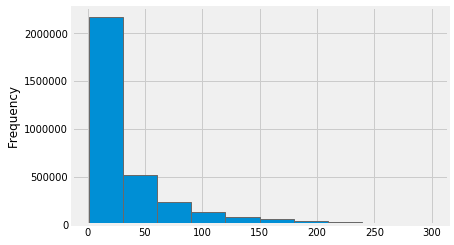

In [53]:
y[(y < 300) & (y > 0)].plot.hist()

In [10]:
train_dataset = cb.Pool(x, y.to_numpy().astype(int), cat_features=['CARRIER', 'ORIGIN', 'DEST'])
eval_dataset = cb.Pool(eval_x, eval_y.to_numpy().astype(int), cat_features=['CARRIER', 'ORIGIN', 'DEST'])

In [55]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9497147 entries, 0 to 10277643
Data columns (total 10 columns):
CARRIER             object
ORIGIN              object
DEST                object
DAY                 int32
MONTH               int32
YEAR                int32
CRS_DEP_TIME_HR     int64
CRS_DEP_TIME_MIN    int64
CRS_ARR_TIME_HR     int64
CRS_ARR_TIME_MIN    int64
dtypes: int32(3), int64(4), object(3)
memory usage: 688.3+ MB


In [11]:
model.fit(train_dataset,
          use_best_model=True,
          eval_set=eval_dataset)  

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 46.2270377	test: 48.9446953	best: 48.9446953 (0)	total: 999ms	remaining: 16m 38s
1:	learn: 46.1449001	test: 48.5461838	best: 48.5461838 (1)	total: 1.6s	remaining: 13m 20s
2:	learn: 46.0818906	test: 48.5860623	best: 48.5461838 (1)	total: 2.28s	remaining: 12m 36s
3:	learn: 46.0393593	test: 48.5831158	best: 48.5461838 (1)	total: 2.93s	remaining: 12m 9s
4:	learn: 46.0086157	test: 48.6739997	best: 48.5461838 (1)	total: 3.49s	remaining: 11m 35s
5:	learn: 45.9808413	test: 48.5985455	best: 48.5461838 (1)	total: 3.95s	remaining: 10m 54s
6:	learn: 45.9550985	test: 48.6169406	best: 48.5461838 (1)	total: 4.45s	remaining: 10m 31s
7:	learn: 45.9383245	test: 48.5171049	best: 48.5171049 (7)	total: 5s	remaining: 10m 20s
8:	learn: 45.9177757	test: 48.5629741	best: 48.5171049 (7)	total: 5.52s	remaining: 10m 7s
9:	learn: 45.9053805	test: 48.5279072	best: 48.5171049 (7)	total: 6.03s	remaining: 9m 57s
10:	learn: 45.8945419	test: 48.5362240	best: 48.5171049 (7)	total: 6.47s	remaining: 9m 41s
11:	le

90:	learn: 45.5239741	test: 48.0697532	best: 48.0653732 (89)	total: 50.7s	remaining: 8m 26s
91:	learn: 45.5220745	test: 48.0657015	best: 48.0653732 (89)	total: 51.2s	remaining: 8m 25s
92:	learn: 45.5184055	test: 48.0560505	best: 48.0560505 (92)	total: 51.7s	remaining: 8m 24s
93:	learn: 45.5167971	test: 48.0536676	best: 48.0536676 (93)	total: 52.1s	remaining: 8m 22s
94:	learn: 45.5148830	test: 48.0479704	best: 48.0479704 (94)	total: 52.7s	remaining: 8m 21s
95:	learn: 45.5128907	test: 48.0427068	best: 48.0427068 (95)	total: 53.3s	remaining: 8m 21s
96:	learn: 45.5119881	test: 48.0420607	best: 48.0420607 (96)	total: 53.9s	remaining: 8m 21s
97:	learn: 45.5098890	test: 48.0352232	best: 48.0352232 (97)	total: 54.3s	remaining: 8m 19s
98:	learn: 45.5073729	test: 48.0255552	best: 48.0255552 (98)	total: 54.8s	remaining: 8m 18s
99:	learn: 45.5060152	test: 48.0222023	best: 48.0222023 (99)	total: 55.2s	remaining: 8m 17s
100:	learn: 45.5033638	test: 48.0065441	best: 48.0065441 (100)	total: 55.8s	rema

177:	learn: 45.3978516	test: 47.8356606	best: 47.8275824 (171)	total: 1m 36s	remaining: 7m 23s
178:	learn: 45.3975310	test: 47.8348837	best: 47.8275824 (171)	total: 1m 36s	remaining: 7m 23s
179:	learn: 45.3967615	test: 47.8346124	best: 47.8275824 (171)	total: 1m 37s	remaining: 7m 22s
180:	learn: 45.3956024	test: 47.8408341	best: 47.8275824 (171)	total: 1m 37s	remaining: 7m 21s
181:	learn: 45.3952556	test: 47.8402873	best: 47.8275824 (171)	total: 1m 38s	remaining: 7m 21s
182:	learn: 45.3933697	test: 47.8401831	best: 47.8275824 (171)	total: 1m 38s	remaining: 7m 21s
183:	learn: 45.3931132	test: 47.8410576	best: 47.8275824 (171)	total: 1m 39s	remaining: 7m 21s
184:	learn: 45.3929588	test: 47.8407061	best: 47.8275824 (171)	total: 1m 39s	remaining: 7m 20s
185:	learn: 45.3920395	test: 47.8405976	best: 47.8275824 (171)	total: 1m 40s	remaining: 7m 20s
186:	learn: 45.3914884	test: 47.8396319	best: 47.8275824 (171)	total: 1m 41s	remaining: 7m 20s
187:	learn: 45.3911701	test: 47.8391111	best: 47.8

264:	learn: 45.3183201	test: 47.7546125	best: 47.7519255 (259)	total: 2m 24s	remaining: 6m 41s
265:	learn: 45.3175754	test: 47.7567711	best: 47.7519255 (259)	total: 2m 25s	remaining: 6m 40s
266:	learn: 45.3170330	test: 47.7586362	best: 47.7519255 (259)	total: 2m 25s	remaining: 6m 39s
267:	learn: 45.3161145	test: 47.7596079	best: 47.7519255 (259)	total: 2m 26s	remaining: 6m 39s
268:	learn: 45.3157576	test: 47.7599752	best: 47.7519255 (259)	total: 2m 26s	remaining: 6m 39s
269:	learn: 45.3153722	test: 47.7598252	best: 47.7519255 (259)	total: 2m 27s	remaining: 6m 38s
270:	learn: 45.3145799	test: 47.7551016	best: 47.7519255 (259)	total: 2m 27s	remaining: 6m 38s
271:	learn: 45.3143538	test: 47.7536603	best: 47.7519255 (259)	total: 2m 28s	remaining: 6m 37s
272:	learn: 45.3137304	test: 47.7542082	best: 47.7519255 (259)	total: 2m 29s	remaining: 6m 37s
273:	learn: 45.3129000	test: 47.7544734	best: 47.7519255 (259)	total: 2m 30s	remaining: 6m 37s
274:	learn: 45.3126216	test: 47.7515972	best: 47.7

351:	learn: 45.2615618	test: 47.7336776	best: 47.7255278 (344)	total: 3m 14s	remaining: 5m 57s
352:	learn: 45.2611830	test: 47.7319986	best: 47.7255278 (344)	total: 3m 14s	remaining: 5m 57s
353:	learn: 45.2607638	test: 47.7309329	best: 47.7255278 (344)	total: 3m 15s	remaining: 5m 57s
354:	learn: 45.2596822	test: 47.7314723	best: 47.7255278 (344)	total: 3m 16s	remaining: 5m 56s
355:	learn: 45.2593296	test: 47.7349847	best: 47.7255278 (344)	total: 3m 16s	remaining: 5m 56s
356:	learn: 45.2589342	test: 47.7335754	best: 47.7255278 (344)	total: 3m 17s	remaining: 5m 55s
357:	learn: 45.2587460	test: 47.7335254	best: 47.7255278 (344)	total: 3m 17s	remaining: 5m 54s
358:	learn: 45.2573475	test: 47.7334188	best: 47.7255278 (344)	total: 3m 18s	remaining: 5m 54s
359:	learn: 45.2566280	test: 47.7392254	best: 47.7255278 (344)	total: 3m 18s	remaining: 5m 53s
360:	learn: 45.2559133	test: 47.7430025	best: 47.7255278 (344)	total: 3m 19s	remaining: 5m 52s
361:	learn: 45.2549055	test: 47.7430677	best: 47.7

438:	learn: 45.2138427	test: 47.6882777	best: 47.6863968 (432)	total: 4m 1s	remaining: 5m 9s
439:	learn: 45.2131059	test: 47.6873330	best: 47.6863968 (432)	total: 4m 2s	remaining: 5m 8s
440:	learn: 45.2126003	test: 47.6894750	best: 47.6863968 (432)	total: 4m 3s	remaining: 5m 8s
441:	learn: 45.2110287	test: 47.6891354	best: 47.6863968 (432)	total: 4m 3s	remaining: 5m 7s
442:	learn: 45.2108522	test: 47.6892356	best: 47.6863968 (432)	total: 4m 4s	remaining: 5m 6s
443:	learn: 45.2103872	test: 47.6891050	best: 47.6863968 (432)	total: 4m 4s	remaining: 5m 6s
444:	learn: 45.2097599	test: 47.6891681	best: 47.6863968 (432)	total: 4m 5s	remaining: 5m 5s
445:	learn: 45.2097194	test: 47.6885607	best: 47.6863968 (432)	total: 4m 5s	remaining: 5m 5s
446:	learn: 45.2094785	test: 47.6885455	best: 47.6863968 (432)	total: 4m 6s	remaining: 5m 4s
447:	learn: 45.2091637	test: 47.6906331	best: 47.6863968 (432)	total: 4m 6s	remaining: 5m 4s
448:	learn: 45.2085054	test: 47.6906462	best: 47.6863968 (432)	total: 

525:	learn: 45.1743371	test: 47.6516653	best: 47.6481968 (517)	total: 4m 49s	remaining: 4m 21s
526:	learn: 45.1740578	test: 47.6488330	best: 47.6481968 (517)	total: 4m 50s	remaining: 4m 20s
527:	learn: 45.1738669	test: 47.6482731	best: 47.6481968 (517)	total: 4m 51s	remaining: 4m 20s
528:	learn: 45.1732344	test: 47.6516827	best: 47.6481968 (517)	total: 4m 51s	remaining: 4m 19s
529:	learn: 45.1729981	test: 47.6507481	best: 47.6481968 (517)	total: 4m 52s	remaining: 4m 18s
530:	learn: 45.1728095	test: 47.6486130	best: 47.6481968 (517)	total: 4m 52s	remaining: 4m 18s
531:	learn: 45.1723608	test: 47.6486217	best: 47.6481968 (517)	total: 4m 53s	remaining: 4m 18s
532:	learn: 45.1722748	test: 47.6481707	best: 47.6481707 (532)	total: 4m 53s	remaining: 4m 17s
533:	learn: 45.1720242	test: 47.6488657	best: 47.6481707 (532)	total: 4m 54s	remaining: 4m 17s
534:	learn: 45.1716662	test: 47.6458197	best: 47.6458197 (534)	total: 4m 55s	remaining: 4m 16s
535:	learn: 45.1706302	test: 47.6463906	best: 47.6

612:	learn: 45.1336932	test: 47.5677307	best: 47.5674077 (604)	total: 5m 39s	remaining: 3m 34s
613:	learn: 45.1336072	test: 47.5677721	best: 47.5674077 (604)	total: 5m 40s	remaining: 3m 33s
614:	learn: 45.1331413	test: 47.5650287	best: 47.5650287 (614)	total: 5m 40s	remaining: 3m 33s
615:	learn: 45.1327997	test: 47.5656704	best: 47.5650287 (614)	total: 5m 41s	remaining: 3m 32s
616:	learn: 45.1323673	test: 47.5646512	best: 47.5646512 (616)	total: 5m 41s	remaining: 3m 32s
617:	learn: 45.1317796	test: 47.5627588	best: 47.5627588 (617)	total: 5m 42s	remaining: 3m 31s
618:	learn: 45.1316171	test: 47.5619098	best: 47.5619098 (618)	total: 5m 43s	remaining: 3m 31s
619:	learn: 45.1313472	test: 47.5622219	best: 47.5619098 (618)	total: 5m 43s	remaining: 3m 30s
620:	learn: 45.1308479	test: 47.5646926	best: 47.5619098 (618)	total: 5m 44s	remaining: 3m 30s
621:	learn: 45.1302291	test: 47.5645071	best: 47.5619098 (618)	total: 5m 44s	remaining: 3m 29s
622:	learn: 45.1301120	test: 47.5634376	best: 47.5

699:	learn: 45.0953391	test: 47.5207698	best: 47.5172197 (690)	total: 6m 28s	remaining: 2m 46s
700:	learn: 45.0952076	test: 47.5206758	best: 47.5172197 (690)	total: 6m 29s	remaining: 2m 46s
701:	learn: 45.0947987	test: 47.5216917	best: 47.5172197 (690)	total: 6m 29s	remaining: 2m 45s
702:	learn: 45.0946768	test: 47.5218074	best: 47.5172197 (690)	total: 6m 30s	remaining: 2m 44s
703:	learn: 45.0945357	test: 47.5203918	best: 47.5172197 (690)	total: 6m 30s	remaining: 2m 44s
704:	learn: 45.0943899	test: 47.5205557	best: 47.5172197 (690)	total: 6m 31s	remaining: 2m 43s
705:	learn: 45.0941627	test: 47.5203853	best: 47.5172197 (690)	total: 6m 31s	remaining: 2m 43s
706:	learn: 45.0940719	test: 47.5203831	best: 47.5172197 (690)	total: 6m 32s	remaining: 2m 42s
707:	learn: 45.0935148	test: 47.5221155	best: 47.5172197 (690)	total: 6m 33s	remaining: 2m 42s
708:	learn: 45.0933115	test: 47.5236949	best: 47.5172197 (690)	total: 6m 33s	remaining: 2m 41s
709:	learn: 45.0930844	test: 47.5237058	best: 47.5

786:	learn: 45.0645615	test: 47.5074768	best: 47.5001056 (781)	total: 7m 17s	remaining: 1m 58s
787:	learn: 45.0644060	test: 47.5076363	best: 47.5001056 (781)	total: 7m 17s	remaining: 1m 57s
788:	learn: 45.0635853	test: 47.5031521	best: 47.5001056 (781)	total: 7m 18s	remaining: 1m 57s
789:	learn: 45.0633963	test: 47.5030406	best: 47.5001056 (781)	total: 7m 18s	remaining: 1m 56s
790:	learn: 45.0630159	test: 47.5032264	best: 47.5001056 (781)	total: 7m 19s	remaining: 1m 56s
791:	learn: 45.0628436	test: 47.5042186	best: 47.5001056 (781)	total: 7m 20s	remaining: 1m 55s
792:	learn: 45.0627024	test: 47.5021687	best: 47.5001056 (781)	total: 7m 20s	remaining: 1m 54s
793:	learn: 45.0625182	test: 47.5019086	best: 47.5001056 (781)	total: 7m 21s	remaining: 1m 54s
794:	learn: 45.0625062	test: 47.5014169	best: 47.5001056 (781)	total: 7m 21s	remaining: 1m 53s
795:	learn: 45.0624201	test: 47.5011677	best: 47.5001056 (781)	total: 7m 22s	remaining: 1m 53s
796:	learn: 45.0623100	test: 47.5010278	best: 47.5

873:	learn: 45.0410049	test: 47.4766270	best: 47.4765789 (871)	total: 8m 8s	remaining: 1m 10s
874:	learn: 45.0408302	test: 47.4762399	best: 47.4762399 (874)	total: 8m 8s	remaining: 1m 9s
875:	learn: 45.0406243	test: 47.4761853	best: 47.4761853 (875)	total: 8m 9s	remaining: 1m 9s
876:	learn: 45.0402317	test: 47.4752035	best: 47.4752035 (876)	total: 8m 9s	remaining: 1m 8s
877:	learn: 45.0401312	test: 47.4749935	best: 47.4749935 (877)	total: 8m 10s	remaining: 1m 8s
878:	learn: 45.0400091	test: 47.4756189	best: 47.4749935 (877)	total: 8m 11s	remaining: 1m 7s
879:	learn: 45.0395901	test: 47.4769047	best: 47.4749935 (877)	total: 8m 11s	remaining: 1m 7s
880:	learn: 45.0393819	test: 47.4758901	best: 47.4749935 (877)	total: 8m 12s	remaining: 1m 6s
881:	learn: 45.0392598	test: 47.4761066	best: 47.4749935 (877)	total: 8m 12s	remaining: 1m 5s
882:	learn: 45.0391640	test: 47.4760497	best: 47.4749935 (877)	total: 8m 13s	remaining: 1m 5s
883:	learn: 45.0387834	test: 47.4770228	best: 47.4749935 (877)	

961:	learn: 45.0127078	test: 47.3854445	best: 47.3824517 (954)	total: 8m 58s	remaining: 21.3s
962:	learn: 45.0125186	test: 47.3847763	best: 47.3824517 (954)	total: 8m 59s	remaining: 20.7s
963:	learn: 45.0122790	test: 47.3839723	best: 47.3824517 (954)	total: 9m	remaining: 20.2s
964:	learn: 45.0119389	test: 47.3837159	best: 47.3824517 (954)	total: 9m	remaining: 19.6s
965:	learn: 45.0117999	test: 47.3829447	best: 47.3824517 (954)	total: 9m 1s	remaining: 19.1s
966:	learn: 45.0113376	test: 47.3822283	best: 47.3822283 (966)	total: 9m 1s	remaining: 18.5s
967:	learn: 45.0108274	test: 47.3825131	best: 47.3822283 (966)	total: 9m 2s	remaining: 17.9s
968:	learn: 45.0106094	test: 47.3817419	best: 47.3817419 (968)	total: 9m 3s	remaining: 17.4s
969:	learn: 45.0105088	test: 47.3810780	best: 47.3810780 (969)	total: 9m 3s	remaining: 16.8s
970:	learn: 45.0104058	test: 47.3816455	best: 47.3810780 (969)	total: 9m 4s	remaining: 16.3s
971:	learn: 45.0101543	test: 47.3808567	best: 47.3808567 (971)	total: 9m 4

In [12]:
values = model.predict(eval_dataset)

In [26]:
print(values.min(), values.max())

-84.71577492795768 257.9159955862269


In [30]:
val[val['DEP_DELAY'] > 260]

,CARRIER,ORIGIN,DEST,DAY,MONTH,YEAR,DEP_DELAY,CRS_DEP_TIME_HR,CRS_DEP_TIME_MIN,CRS_ARR_TIME_HR,CRS_ARR_TIME_MIN
2909070,9E,AGS,ATL,30,6,2018,366,8,30,9,35
2909250,9E,ATL,AVL,25,6,2018,652,22,31,23,34
2909255,9E,ATL,AVL,27,6,2018,583,22,31,23,34
2909552,9E,ATL,CHO,28,6,2018,313,13,48,15,31
2909602,9E,ATL,CID,25,6,2018,467,15,31,16,41
...,...,...,...,...,...,...,...,...,...,...,...
3536321,YX,XNA,EWR,4,6,2018,410,16,40,20,48
3536373,YX,XNA,IAH,27,6,2018,387,11,58,13,40
3536435,YX,XNA,ORD,16,6,2018,415,6,15,8,12
3536438,YX,XNA,ORD,20,6,2018,374,6,15,8,12


In [37]:
model.feature_importances_

array([ 8.89175975,  8.22744842,  9.849001  , 24.18418287, 26.83391425,
        6.51205185,  9.44101988,  0.51526101,  5.23880497,  0.30655599])

In [42]:
t = val.drop(["DEP_DELAY"], axis = 1)
for i,x in enumerate(t.columns):
    print(x, model.feature_importances_[i])

CARRIER 8.891759746782924
ORIGIN 8.22744842397076
DEST 9.849001001465782
DAY 24.184182866842942
MONTH 26.833914248624108
YEAR 6.512051850325742
CRS_DEP_TIME_HR 9.441019883158589
CRS_DEP_TIME_MIN 0.5152610148507875
CRS_ARR_TIME_HR 5.2388049698483865
CRS_ARR_TIME_MIN 0.30655599413015816


In [ ]:
linear_reg_model = LinearRegression()

In [ ]:
import gc
gc.collect()

In [ ]:
x = pd.concat([x, pd.get_dummies(x['ORIGIN'], prefix="ORIGIN_")], axis = 1)

In [ ]:
x = pd.concat([x, pd.get_dummies(x['DEST'], prefix="DEST_")], axis = 1)

In [ ]:
x = pd.concat([x, pd.get_dummies(x['DEST'], prefix="DEST_")], axis = 1)

In [ ]:
x['DEST'].value_counts()

In [34]:
model.save_model("catboost_model.pth")